In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/Desktop/Project/dataset.csv')

df.fillna(df.mean(numeric_only=True), inplace=True)

import warnings

warnings.filterwarnings("ignore")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Desktop/Project/dataset.csv'

India: R^2 = 1.0000, MSE = 0.0008
Training Data - India:
Actual Values: [9149.752, 9135.916, 9095.71, 9080.132, 9094.629, 9123.063, 9154.384, 9162.368, 9139.211, 9072.346, 8986.805, 8876.169, 8825.601, 8838.896, 8927.865, 9098.071, 9280.916, 10262.275]
Predicted Values: [9149.750360133214, 9135.916962549172, 9095.709296058501, 9080.131329884425, 9094.629315483977, 9123.065079716756, 9154.384818165334, 9162.367785449565, 9139.210319222853, 9072.346202461204, 8986.805300894555, 8876.170631837418, 8825.59979636549, 8838.894161428227, 8927.865520822434, 9098.070337376392, 9280.919307757138, 10262.272474393329]

Test Data - India:
Actual Values: [10262.275, 13299.618, 12862.015]
Predicted Values: [10262.272474393329, 13299.572951452195, 12861.99778750842]

Forecast Data - India:
Forecasted Values: [12861.99778750842, 9368.355243421422, 9531.825915989839, 9702.076037460456, 9876.303365866952, 10053.393068560466, 10231.049833152105, 10413.415116543169, 10594.02075480822, 10779.932933497348, 1

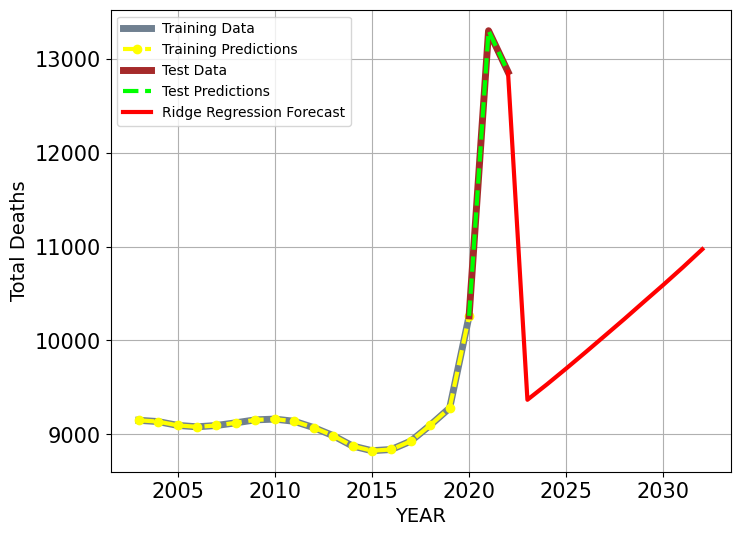

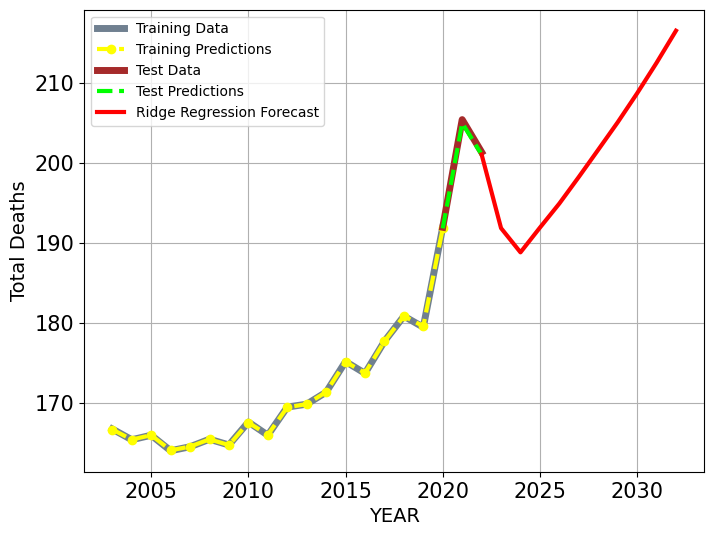

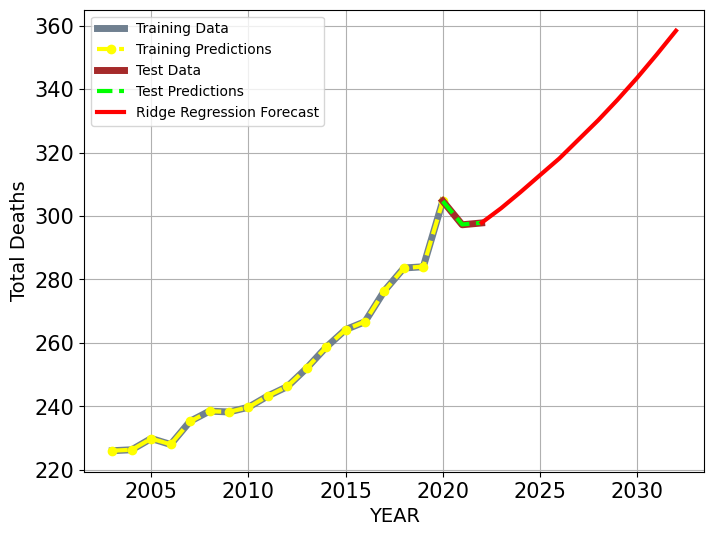

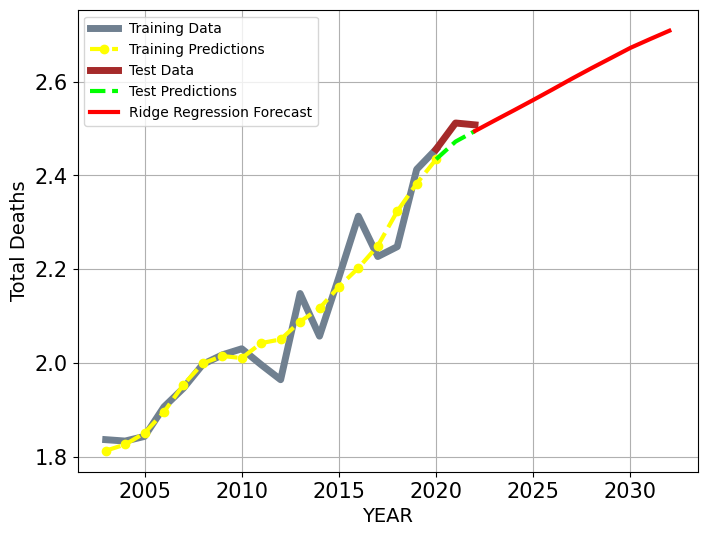

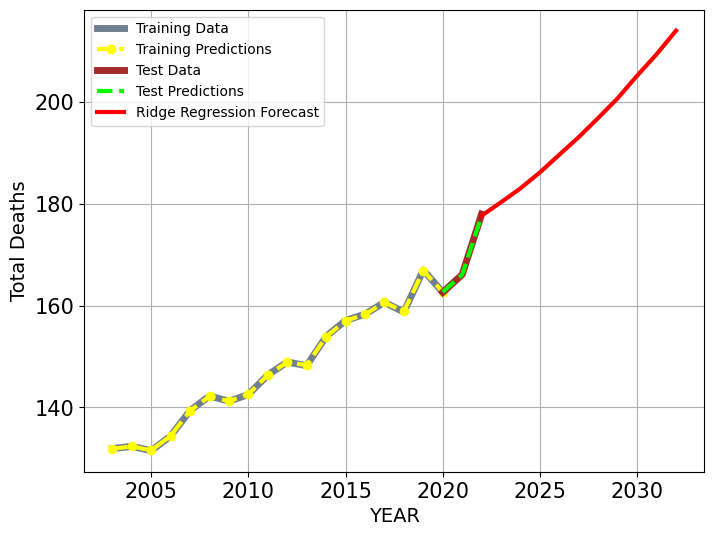

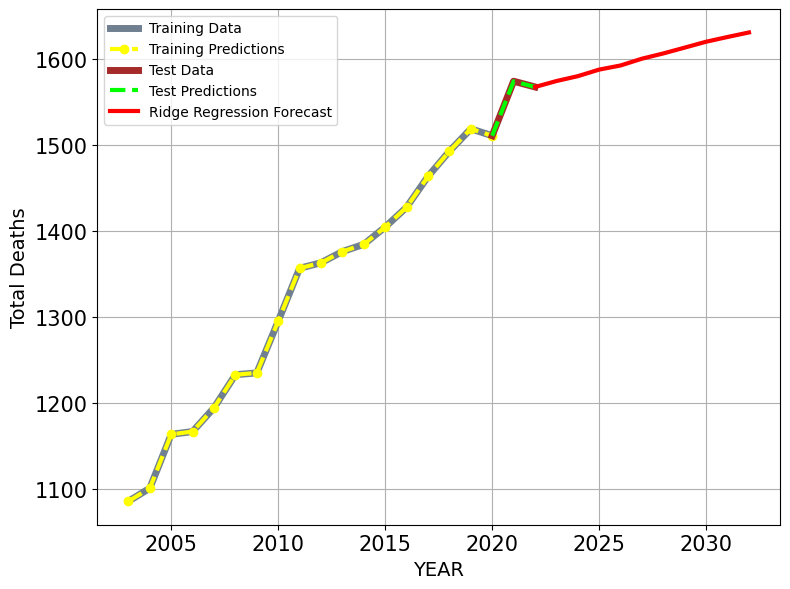

   Location  Time CBR_Prediction  Prediction of Total Deaths
0     India  2022            NaN                12861.997788
1     India  2023            NaN                 9368.355243
2     India  2024            NaN                 9531.825916
3     India  2025            NaN                 9702.076037
4     India  2026            NaN                 9876.303366
..      ...   ...            ...                         ...
61    Japan  2028            NaN                 1606.884279
62    Japan  2029            NaN                 1613.655508
63    Japan  2030            NaN                 1620.501078
64    Japan  2031            NaN                 1625.991778
65    Japan  2032            NaN                 1631.275322

[66 rows x 4 columns]


In [2]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

countries_to_keep = ['India', 'Madagascar', 'Canada', 'Iceland', 'Australia', 'Japan']
df = df[df['Location'].isin(countries_to_keep)]

df_train = df[(df['Time'] >= 2003) & (df['Time'] <= 2020)]
df_test = df[(df['Time'] >= 2020) & (df['Time'] <= 2022)]
df_predict = df[(df['Time'] >= 2022) & (df['Time'] <= 2032)]

target_column = 'Deaths'

additional_features = ['DeathsMale', 'DeathsFemale', 'TPopulation1Jan', 'LBsurvivingAge1', 'Births', 'Births1519']

predictions_df = pd.DataFrame(columns=['Location', 'Time', 'CBR_Prediction'])

for i, country in enumerate(countries_to_keep):
    fig, ax = plt.subplots(figsize=(8, 6))
    country_train_data = df_train[df_train['Location'] == country]
    country_test_data = df_test[df_test['Location'] == country]
    country_predict_data = df_predict[df_predict['Location'] == country]

    X_train = country_train_data[additional_features]
    y_train = country_train_data[target_column]

    X_test = country_test_data[additional_features]
    y_test = country_test_data[target_column]

    X_predict = country_predict_data[additional_features]

    
    model = Ridge(alpha=1.0) 
    model.fit(X_train, y_train)
    
    forecast_values = model.predict(X_predict)
   
    r2 = r2_score(y_test, model.predict(X_test))
    mse = mean_squared_error(y_test, model.predict(X_test))
    
    print(f"{country}: R^2 = {r2:.4f}, MSE = {mse:.4f}")
    
    train_predictions = model.predict(X_train)
    print(f"Training Data - {country}:\nActual Values: {list(y_train)}\nPredicted Values: {list(train_predictions)}\n")
    
    test_predictions = model.predict(X_test)
    print(f"Test Data - {country}:\nActual Values: {list(y_test)}\nPredicted Values: {list(test_predictions)}\n")
    
    
    ax.plot(country_train_data['Time'], y_train, label='Training Data',linewidth=5,  color='slategrey')
    ax.plot(country_train_data['Time'], train_predictions, label='Training Predictions',linewidth=3, linestyle='--', color='yellow',marker='o')

    ax.plot(country_test_data['Time'], y_test, label='Test Data',linewidth=5,  color='brown')
    ax.plot(country_test_data['Time'], test_predictions, label='Test Predictions', linestyle='--',linewidth=3, color='lime')
    ax.plot(country_predict_data['Time'], forecast_values, label='Ridge Regression Forecast',linewidth=3, color='red')
    
    
    #ax.set_title(f'Ridge Regression for {country}')
    ax.set_xlabel('YEAR', fontsize=14)
    ax.set_ylabel('Total Deaths', fontsize=14)
    ax.legend()
    ax.grid()
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)

    print(f"Forecast Data - {country}:\nForecasted Values: {list(forecast_values)}\n")

    country_predictions = pd.DataFrame({
        'Location': [country] * len(country_predict_data),
        'Time': country_predict_data['Time'],
        'Prediction of Total Deaths': forecast_values
    })

    predictions_df = pd.concat([predictions_df, country_predictions], ignore_index=True)

plt.tight_layout()
plt.show()

print(predictions_df)
